## Pakiet Pandas

Pakiet Pandas to prawdopodobnie najważniejsza bibliotego języka Python dla analityka danych. 

Biblioteka pozwala na tworzenie zbiorów danych (ang. *DataFrame*) analogicznych do tych wpisanych w arkuszach Excel. Pakiet umożliwia w przystępny sposób wykorzystywać operacje na całych kolumnach danych bez pisania rozległych pętli. 

### Tworzenie DataFrame
Jak stworzyć obiekt *DataFrame*? W przypadku programów pobierających dane np. ze stron www czy API najczęsciej będizemy konwertowac słownik.

Wygląda to tak:

In [1]:
import pandas as pd

# Dane składujemy w kilku listach - jest to mocno niekomfortowe. Ich edytowanie czy nawet przeglądanie jest trudne.
nazwiska = ["Neymar", "Kylian Mbappé", "Philippe Coutinho"]	
pozycja = ["Lewy napastnik", "Środkowy napastnik", "Ofensywny pomocnik"]
odstepne = [222, 145, 135]

# Listy możemy zorganizować w słownik - nie da nam on jednak dużej funkcjonalności
slownik_dane = {
    "Nazwisko": nazwiska,
    "Pozycja": pozycja,
    "Transfer": odstepne    
}

# Tutaj pojawia się pakiet pandas:
pandas_dane = pd.DataFrame(slownik_dane)

print(pandas_dane)


            Nazwisko             Pozycja  Transfer
0             Neymar      Lewy napastnik       222
1      Kylian Mbappé  Środkowy napastnik       145
2  Philippe Coutinho  Ofensywny pomocnik       135


*DataFrame* możemy stworzyć też z każdej listy obiektów np. listy list bądź listy krotek. Takie rozwiązanie wymagać będzie jednak zdefiniowania nazw kolumn:

In [2]:
dane_listaF1 = [("Max Verstappen",	"Holandia",	"Red Bull Racing",	351.5), 
                ("Lewis Hamilton",	"W. Brytania",	"Mercedes",	343.5), 
                ("Valtteri Bottas",	"Finlandia",	"Mercedes",	203)]

dane_pandasF1 = pd.DataFrame.from_records(dane_listaF1, columns=['Kierowca', 'Kraj', 'Team', 'Pkt'])
print(dane_pandasF1)


          Kierowca         Kraj             Team    Pkt
0   Max Verstappen     Holandia  Red Bull Racing  351.5
1   Lewis Hamilton  W. Brytania         Mercedes  343.5
2  Valtteri Bottas    Finlandia         Mercedes  203.0


### Wczytywanie danych z plików
Prawdziwym benefitem jest jednak możliwość prostego wczytania danych z pliku. Biblioteka pandas umożliwia otworzenie danych z: 
* plików CSV 
* plików Excel, Open Office
* większości pakietów statystycznych np. SPSS, Stata.

Artykuł przeglądowy można znaleźć [tutaj](https://pandas.pydata.org/pandas-docs/stable/user_guide/io.html) 

Posłużymy się przykładem - ściągniemy plik CSV z Githuba.

Instrukcja head wyświetli nam kilka pierwszych wierszy z tabeli.

In [3]:
import pandas as pd
URL = "https://raw.githubusercontent.com/jakubrybacki/Karowa_Python_Introduction/main/Zajecia%208/SerieA_2020_2021.csv"

dane_SerieA = pd.read_csv(URL)
dane_SerieA.head(10)

,MatchID,StatName,StatValue
0,g_1_zTgyEAHp,MatchDate,23.05.2021 20:45
1,g_1_zTgyEAHp,HomeTeam,Atalanta
2,g_1_zTgyEAHp,AwayTeam,AC Milan
3,g_1_zTgyEAHp,Goals,0\n-\n2
4,g_1_zTgyEAHp,Home: Posiadanie piłki,68%
5,g_1_zTgyEAHp,Away: Posiadanie piłki,32%
6,g_1_zTgyEAHp,Home: Sytuacje bramkowe,11
7,g_1_zTgyEAHp,Away: Sytuacje bramkowe,7
8,g_1_zTgyEAHp,Home: Strzały na bramkę,1
9,g_1_zTgyEAHp,Away: Strzały na bramkę,3


Zawartość tabeli można wyświetlić komendą info:

In [4]:
dane_SerieA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11256 entries, 0 to 11255
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   MatchID    11256 non-null  object
 1   StatName   11256 non-null  object
 2   StatValue  11256 non-null  object
dtypes: object(3)
memory usage: 263.9+ KB


Ewentualnie w jeszcze krótszej formie:

In [5]:
dane_SerieA.keys()

Index(['MatchID', 'StatName', 'StatValue'], dtype='object')

### Dane fromat Wide / Long

Dane pobierane z internetu mogą mieć długą formułe - tak jest z naszym przykładowym plikiem z Serie A. 

Biblioteka pandas pozwala to jednak szybko przekształcić na plik ułożony w wierszach. Przykład poniżej.

In [6]:
daneSerieA_wide = dane_SerieA.pivot(index='MatchID', columns='StatName', values='StatValue')
daneSerieA_wide.info()


<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, g_1_02we3ppq to g_1_zytX7ufI
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Away: Ataki                  352 non-null    object
 1   Away: Bloki                  352 non-null    object
 2   Away: Czerwone kartki        57 non-null     object
 3   Away: Faule                  353 non-null    object
 4   Away: Interwencje bramkarzy  353 non-null    object
 5   Away: Podania                2 non-null      object
 6   Away: Podania celne          353 non-null    object
 7   Away: Posiadanie piłki       353 non-null    object
 8   Away: Rzuty rożne            353 non-null    object
 9   Away: Rzuty wolne            353 non-null    object
 10  Away: Spalone                353 non-null    object
 11  Away: Strzały na bramkę      353 non-null    object
 12  Away: Strzały niecelne       353 non-null    object
 13  Away: Strzały zablok

In [7]:
daneSerieA_wide.keys()

Index(['Away: Ataki', 'Away: Bloki', 'Away: Czerwone kartki', 'Away: Faule',
       'Away: Interwencje bramkarzy', 'Away: Podania', 'Away: Podania celne',
       'Away: Posiadanie piłki', 'Away: Rzuty rożne', 'Away: Rzuty wolne',
       'Away: Spalone', 'Away: Strzały na bramkę', 'Away: Strzały niecelne',
       'Away: Strzały zablokowane', 'Away: Sytuacje bramkowe',
       'Away: Wrzuty z autu', 'Away: Żółte kartki', 'AwayTeam', 'Goals',
       'Home: Ataki', 'Home: Bloki', 'Home: Czerwone kartki', 'Home: Faule',
       'Home: Interwencje bramkarzy', 'Home: Podania', 'Home: Podania celne',
       'Home: Posiadanie piłki', 'Home: Rzuty rożne', 'Home: Rzuty wolne',
       'Home: Spalone', 'Home: Strzały na bramkę', 'Home: Strzały niecelne',
       'Home: Strzały zablokowane', 'Home: Sytuacje bramkowe',
       'Home: Wrzuty z autu', 'Home: Żółte kartki', 'HomeTeam', 'MatchDate'],
      dtype='object', name='StatName')

Obejrzyjmy też pierwszych 10 wierszy po zmianie:

In [8]:
daneSerieA_wide.head(10)


StatName,Away: Ataki,Away: Bloki,Away: Czerwone kartki,Away: Faule,Away: Interwencje bramkarzy,Away: Podania,Away: Podania celne,Away: Posiadanie piłki,Away: Rzuty rożne,Away: Rzuty wolne,Away: Spalone,Away: Strzały na bramkę,Away: Strzały niecelne,Away: Strzały zablokowane,Away: Sytuacje bramkowe,Away: Wrzuty z autu,Away: Żółte kartki,AwayTeam,Goals,Home: Ataki,Home: Bloki,Home: Czerwone kartki,Home: Faule,Home: Interwencje bramkarzy,Home: Podania,Home: Podania celne,Home: Posiadanie piłki,Home: Rzuty rożne,Home: Rzuty wolne,Home: Spalone,Home: Strzały na bramkę,Home: Strzały niecelne,Home: Strzały zablokowane,Home: Sytuacje bramkowe,Home: Wrzuty z autu,Home: Żółte kartki,HomeTeam,MatchDate
MatchID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
g_1_02we3ppq,105,18,NaN,15,3,NaN,247,44%,5,24,3,7,3,3,13,NaN,3,Spezia,1\n-\n2,80,15,NaN,20,5,NaN,293,56%,5,18,4,4,3,1,8,NaN,2,Sassuolo,06.02.2021 15:00
g_1_04GpdEKP,86,12,NaN,13,6,NaN,286,36%,5,8,5,3,1,NaN,4,NaN,4,Sampdoria,2\n-\n1,154,15,NaN,7,2,NaN,682,64%,7,17,1,8,5,NaN,13,NaN,3,Napoli,13.12.2020 15:00
g_1_0C6WcbRn,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Torino,1\n-\n1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Verona,09.05.2021 15:00
g_1_0IDgPtPh,73,15,NaN,16,3,NaN,178,29%,4,12,2,6,1,0,7,NaN,5,Fiorentina,3\n-\n1,110,7,NaN,8,5,NaN,605,71%,3,16,4,6,5,0,11,NaN,3,Sassuolo,17.04.2021 18:00
g_1_0KGYuBmB,83,13,NaN,13,5,NaN,351,48%,4,17,4,8,2,5,15,NaN,2,Napoli,3\n-\n3,105,10,NaN,16,5,NaN,486,52%,6,16,1,8,1,6,15,NaN,2,Sassuolo,03.03.2021 18:30
g_1_0KvmV8iq,145,10,NaN,11,3,NaN,481,57%,9,12,0,6,4,5,15,NaN,0,AC Milan,3\n-\n0,86,23,NaN,10,6,NaN,295,43%,1,11,3,6,5,3,14,NaN,2,Lazio,26.04.2021 20:45
g_1_0M1xGNTl,103,16,NaN,15,3,NaN,278,50%,4,18,1,4,4,5,13,NaN,2,Parma,2\n-\n1,136,14,NaN,16,3,NaN,292,50%,4,17,3,5,2,4,11,NaN,4,Verona,15.02.2021 20:45
g_1_0O6pc9N9,93,20,NaN,12,4,NaN,381,53%,4,12,4,13,2,2,17,NaN,1,AC Milan,1\n-\n2,105,15,NaN,13,11,NaN,338,47%,6,17,2,5,3,2,10,NaN,2,Bologna,30.01.2021 15:00
g_1_0U7iHczU,124,19,NaN,11,4,NaN,412,53%,8,12,2,11,7,NaN,18,NaN,0,AS Roma,1\n-\n3,99,6,NaN,10,8,NaN,435,47%,1,13,2,5,2,NaN,7,NaN,1,Genoa,08.11.2020 15:00


### Wybieranie poszczególnych kolumn

Obecnie posiadamy bardzo duży pakiet informacji, a nie potrzebujemy całej jego zawartości. Załóżmy, że zależy nam tylko na kilku informacjach o bramkach i strzałach. 

Przeniesiemy je do nowego obiektu:

In [9]:
snapSerieA = daneSerieA_wide[['HomeTeam', 'AwayTeam', 'Goals', "Home: Strzały na bramkę", "Away: Strzały na bramkę"]]
snapSerieA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, g_1_02we3ppq to g_1_zytX7ufI
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   HomeTeam                 380 non-null    object
 1   AwayTeam                 380 non-null    object
 2   Goals                    380 non-null    object
 3   Home: Strzały na bramkę  353 non-null    object
 4   Away: Strzały na bramkę  353 non-null    object
dtypes: object(5)
memory usage: 17.8+ KB


### Szybkie konwersje typów
Dane pobierane z CSV czy z sieci web będą utrzymywane w formie napisu (str) Pakiet pandas umożliwia szybką konwersję.

Chcemy przekształcić informację o strzałach na bramkę do typu numerycznego:

In [10]:
snapSerieA[["Home: Strzały na bramkę", "Away: Strzały na bramkę"]] = snapSerieA[["Home: Strzały na bramkę", "Away: Strzały na bramkę"]].astype(float)
snapSerieA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, g_1_02we3ppq to g_1_zytX7ufI
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   HomeTeam                 380 non-null    object 
 1   AwayTeam                 380 non-null    object 
 2   Goals                    380 non-null    object 
 3   Home: Strzały na bramkę  353 non-null    float64
 4   Away: Strzały na bramkę  353 non-null    float64
dtypes: float64(2), object(3)
memory usage: 17.8+ KB


/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


### Modyfikowanie zawartości kolumn - proste obliczenia
Pandas oferuje możliwość bardzo szybkiego wykonywania obliczeń na podstawie posiadanych serii danych.

Przypuśćmy, że chcemy stworzyć serie róznica strzałów na podstawie danych z dwóch serii (strzały gospodarza, strzały gościa). 

Na początek obejrzyjmy wyniki z pierwszych 5 spotkań:

In [11]:
snapSerieA[["Home: Strzały na bramkę", "Away: Strzały na bramkę"]].head(5)

StatName,Home: Strzały na bramkę,Away: Strzały na bramkę
MatchID,,
g_1_02we3ppq,4.0,7.0
g_1_04GpdEKP,8.0,3.0
g_1_0C6WcbRn,NaN,NaN
g_1_0IDgPtPh,6.0,6.0
g_1_0KGYuBmB,8.0,8.0


Stworzenie nowej serii danych zawierających różnicę odbywa się podobnie jak w słowniku - wystarczy tylko jedna komenda:

In [12]:
snapSerieA["Różnica: Strzały na bramkę"] = snapSerieA["Home: Strzały na bramkę"] - snapSerieA["Away: Strzały na bramkę"]
snapSerieA[["Home: Strzały na bramkę", "Away: Strzały na bramkę", "Różnica: Strzały na bramkę"]].head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


StatName,Home: Strzały na bramkę,Away: Strzały na bramkę,Różnica: Strzały na bramkę
MatchID,,,
g_1_02we3ppq,4.0,7.0,-3.0
g_1_04GpdEKP,8.0,3.0,5.0
g_1_0C6WcbRn,NaN,NaN,NaN
g_1_0IDgPtPh,6.0,6.0,0.0
g_1_0KGYuBmB,8.0,8.0,0.0


### Modyfikowanie zawartości kolumn - operacje na tekstach
Pakiet pandas posiada zaimplementowane wszystkie główne metody typu string do przeprowadzania na całej kolumnie danych. Aby je wykonać należy dopisać do nazwy kolumny *str.nazwa_metody*

Przetrenujemy wykorzystanie metod *replace*, *split* i *strip* na kolumnie Goals. Najpierw wydrukujmy zawartość - zobaczymy m.in znaki końca linii, separator w formie myślnika. 

In [13]:
snapSerieA["Goals"].head(5)

MatchID
g_1_02we3ppq    1\n-\n2
g_1_04GpdEKP    2\n-\n1
g_1_0C6WcbRn    1\n-\n1
g_1_0IDgPtPh    3\n-\n1
g_1_0KGYuBmB    3\n-\n3
Name: Goals, dtype: object

Najpierw usuwamy znaki końca lini (\n) - wykorzystamy metodę *replace*:

In [14]:
snapSerieA["Goals"] = snapSerieA["Goals"].str.replace("\n", "")
snapSerieA["Goals"].head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


MatchID
g_1_02we3ppq    1-2
g_1_04GpdEKP    2-1
g_1_0C6WcbRn    1-1
g_1_0IDgPtPh    3-1
g_1_0KGYuBmB    3-3
Name: Goals, dtype: object

Metodą *split* usuniemy separator w postaci myślnika. 

W *DataFrame* pojawia się  w niej dodatkowy argument expand:
* Domyślenie jest on ustawiony na *False* - wtedy funkcja zwraca listę zupełnie jak bazowa metoda string
* Ustawienie go na *True* spowoduje zwrócenie rozpakowanych elementów listy - wykorzystam to, aby od razu powołać dwie nowe kolumny.

In [15]:
snapSerieA[["Home: Goals", "Away: Goals"]] = snapSerieA["Goals"].str.split("-", expand = True)
snapSerieA[["Goals", "Home: Goals", "Away: Goals"]].head(5)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3069: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


StatName,Goals,Home: Goals,Away: Goals
MatchID,,,
g_1_02we3ppq,1-2,1,2
g_1_04GpdEKP,2-1,2,1
g_1_0C6WcbRn,1-1,1,1
g_1_0IDgPtPh,3-1,3,1
g_1_0KGYuBmB,3-3,3,3


Na koniec wyczyścimy białe znaki i przemianujemy wartości bramek na numeryczne:

In [16]:
snapSerieA["Home: Goals"] = snapSerieA["Home: Goals"].str.strip().astype(float)
snapSerieA["Away: Goals"] = snapSerieA["Away: Goals"].str.strip().astype(float)

snapSerieA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 380 entries, g_1_02we3ppq to g_1_zytX7ufI
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   HomeTeam                    380 non-null    object 
 1   AwayTeam                    380 non-null    object 
 2   Goals                       380 non-null    object 
 3   Home: Strzały na bramkę     353 non-null    float64
 4   Away: Strzały na bramkę     353 non-null    float64
 5   Różnica: Strzały na bramkę  353 non-null    float64
 6   Home: Goals                 380 non-null    float64
 7   Away: Goals                 380 non-null    float64
dtypes: float64(5), object(3)
memory usage: 26.7+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Analiza - podstawowe statystyki opisowe
Pakiet Pandas posiada gotowy szybki wydruk statystyk opisowych przy pomocy metody *describe*:

In [17]:
snapSerieA[["Home: Goals", "Away: Goals", "Różnica: Strzały na bramkę"]].describe()

StatName,Home: Goals,Away: Goals,Różnica: Strzały na bramkę
count,380.000000,380.000000,353.000000
mean,1.634211,1.426316,0.739377
std,1.337658,1.181360,4.320282
min,0.000000,0.000000,-13.000000
25%,1.000000,1.000000,-2.000000
50%,1.000000,1.000000,1.000000
75%,2.000000,2.000000,3.000000
max,6.000000,7.000000,12.000000


Możemy przeprowadzić też dużą gamę obliczeń wykorzystując gotowe metody. Pełny spis znajdziemy w [dokumentacji](https://pandas.pydata.org/docs/reference/frame.html) 

Kilka przykładów poniżej.

Moda:

In [18]:
snapSerieA[["Home: Goals", "Away: Goals", "Różnica: Strzały na bramkę"]].mode(dropna=True)

StatName,Home: Goals,Away: Goals,Różnica: Strzały na bramkę
0,1.0,1.0,2.0


Odchylenie standardowe:

In [19]:
snapSerieA[["Home: Goals", "Away: Goals", "Różnica: Strzały na bramkę"]].std()

StatName
Home: Goals                   1.337658
Away: Goals                   1.181360
Różnica: Strzały na bramkę    4.320282
dtype: float64

Macierz Korelacji: 

In [20]:
snapSerieA[["Home: Goals", "Away: Goals", "Różnica: Strzały na bramkę"]].corr()

StatName,Home: Goals,Away: Goals,Różnica: Strzały na bramkę
StatName,,,
Home: Goals,1.000000,-0.058008,0.451087
Away: Goals,-0.058008,1.000000,-0.391301
Różnica: Strzały na bramkę,0.451087,-0.391301,1.000000


### Wizualizacja danych na wykresie
Wykonaliśmy kilka obliczeń - warto je przedstawić na wykresie. Najbardziej praktycznym rozwiązaniem będzie w tym przypadku prosty histogram. 

Pandas korzysta z biblioteki *MatPlotLib*, która pozwala na bardzo szczegółowe określanie treści wykresów. 

My stworzymy je z domyślnymi wartościami - będzie to trochę mało okazałe.



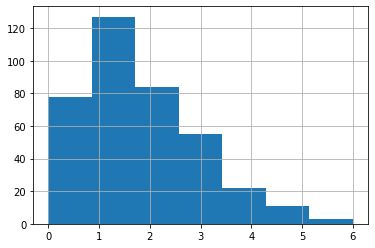

In [21]:
snapSerieA["Home: Goals"].hist(bins=7)

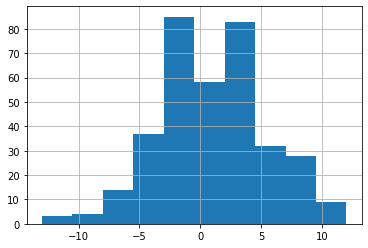

In [22]:
snapSerieA["Różnica: Strzały na bramkę"].hist()

### Eksport wyników do pliku

Pakiet Pandas pozwala szybko zapisać treść do pliku za pomocą gotowych metod. Zapiszemy nasz *DataFrame* do miejsca z którego wykonujemy skrypt.

Najpierw wydobądźmy nazwę ścieżki

In [23]:
import os
filePath = os.getcwd() + "/" 
print(filePath)

/content/


Zapiszmy plik - warto tu zwrócić uwagę na kodowanie. Standardowo pliki zapisywane są w uniwersalnym formacie UTF-8. Takie rozwiązanie nie jest kompatybilne z pakietem MS Office.

Aby temu przeciwdziałać można dodać argument *encoding*:

In [24]:
snapSerieA.to_csv(filePath + "SerieASnap_UTF.csv", index = False)
snapSerieA.to_csv(filePath + "SerieASnap_Windows.csv", index = False, encoding="windows-1250")